In [60]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [61]:
# Dados carregados em um numpy array
data = np.loadtxt('cluster.dat')

In [223]:
# Dados normalizados que serão utilizados como uma comparação 
data_norm = data/data.max(axis=0)

In [ ]:
# divisão para dados de treinamento e dados de teste
np.random.shuffle(data_norm)
train_index_norm = int(data_norm.shape[0]*0.9)
train_data_norm,test_data_norm = np.vsplit(data_norm,[train_index_norm])

In [341]:
def dbscan(data_in: np.ndarray, radius_of_neighborhood: float, number_of_neighbors: int) -> np.ndarray:
    #inicialização da lista de classificação dos pontos
    core_points = []
    border_points = []
    outliers =[]

    #mepamento de todos os pontos do dataset, mantem a lista de quais não foram visitados ainda
    availabe_points = []
    for i in range(data_in.shape[0]):
        availabe_points.append(i)
    
    #escolha aleatoria de um ponto
    index_list = [np.random.choice(data_in.shape[0])]
    
    #enquanto ainda houver pontos não visitados, este laço é executado
    while availabe_points:
        
        #se existe elemento em index_list, ele retira o topo e continua o processamento
        #se não ele escolhe um aleatório dos pontos disponíveis
        if index_list:
            point = index_list.pop(0)
        else:
            point = availabe_points[np.random.choice(len(availabe_points))]
        
        #remove o ponto utilizado da lista de pontos disponíveis
        availabe_points.remove(point)
        
        #calcula a distância entre o ponto escolhido e todos os outros do dataset
        dist = np.linalg.norm(data_in[point]-data_in,axis=1)
    
        #identifica os vizinhos do ponto escolhido de acordo com o raio passado como parâmetro
        neighbors = np.where(dist < radius_of_neighborhood)[0]
    
        #adiciona todos os pontos alcancáveis pelo ponto escolhido se ele ainda não foi processado e se ele já não está presente em index_list
        for i in neighbors:
            if (i in availabe_points) and (i not in index_list):
                index_list.append(i)

        #classificação dos pontos
        if neighbors.shape[0] >= number_of_neighbors:
            core_points.append(point)
        elif neighbors.any() in core_points:
            border_points.append(point)
        else:
            outliers.append(point)

    #etapa para verificar se outliers realmente são outliers
    for i in outliers:
        #calcula a distância entre o ponto escolhido e todos os outros do dataset
        dist = np.linalg.norm(i-data_in,axis=1)
    
        #identifica os vizinhos do ponto escolhido de acordo com o raio passado como parâmetro
        neighbors = np.where(dist < radius_of_neighborhood)[0]

        if neighbors.any() in core_points:
            outlier.remove(i)
            border.append(i)

        
    
    return core_points, border_points, outliers

def dbscan_clusters(core_points: list):

    return

def dbscan_fit():
    pass

In [366]:
core, border, outlier = dbscan(data_in = data_norm, radius_of_neighborhood = 0.0477, number_of_neighbors = 5)
print(border)

[0, 36, 145, 88, 165, 168, 166, 444, 443]


In [367]:

core.sort()
border.sort()
outlier.sort()

In [368]:
x_core, y_core = np.hsplit(data_norm[core], 2)
x_border, y_border = np.hsplit(data_norm[border], 2)
x_outlier, y_outlier = np.hsplit(data_norm[outlier], 2)

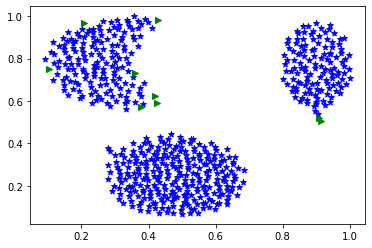

In [369]:
plt.scatter(x_core, y_core, marker='*', color = 'b')
plt.scatter(x_border, y_border, marker='>', color = 'g')
plt.scatter(x_outlier, y_outlier, marker='X', color = 'r')
plt.show()